In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
#Corey's Colour Blind Tools 
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

CB_color_dict = {'blue':'#377eb8',
                 'orange': '#ff7f00',
                 'green': '#4daf4a',
                 'pink': '#f781bf', 
                 'brown': '#a65628',
                 'purple': '#984ea3',
                 'grey': '#999999', 
                 'black': '#000000',
                 'red': '#e41a1c', 
                 'yellow': '#dede00'}

In [12]:
file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-1/"
interaction_log = pd.read_csv(file_path + "interactions.csv")

In [4]:
interaction_log.head()

,timestamp,elapsedtime,x,y,description
0,NaN,6071.95,1191.0,204.0,tutorial button clicked
1,26 Jan 2020 5:54:16pm:253,6683.44,1102.0,327.0,tutorial pane closed
2,26 Jan 2020 5:54:16pm:890,7320.14,404.0,383.0,startblock block added
3,26 Jan 2020 5:54:17pm:563,7993.28,735.0,477.0,threefourbar block added
4,26 Jan 2020 5:54:18pm:161,8591.51,618.0,478.0,threefourbar start drag


In [5]:
interaction_log.describe()

,elapsedtime,x,y
count,207.000000,207.000000,207.000000
mean,62176.366618,595.439614,403.821256
std,42325.593018,292.494353,129.596581
min,6071.950000,46.000000,69.000000
25%,25969.550000,360.000000,322.000000
50%,47582.400000,571.000000,407.000000
75%,90022.600000,819.000000,510.000000
max,150234.000000,1285.000000,799.000000


## Click Visualisation

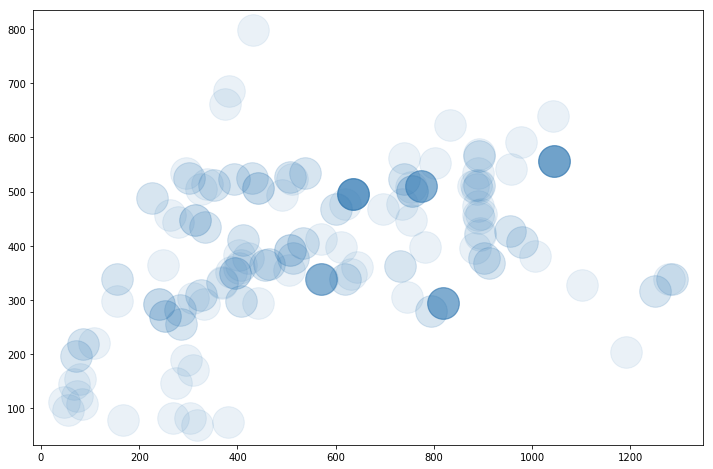

In [6]:
#draw clicks
import matplotlib.animation as animation

x = interaction_log.x
y = interaction_log.y

fig, ax = pp.subplots()
ax.scatter(x,y,color=CB_color_dict["blue"], alpha=0.1, s=1000.0)

myPlot = matplotlib.pyplot.gcf()
myPlot.set_size_inches(12, 8) #inches

## Prepare Data

In [7]:
def prepareLogs():
    interaction_log["ones"] = np.ones(int(interaction_log.x.size)) 
prepareLogs()
interaction_log.head()

,timestamp,elapsedtime,x,y,description,ones
0,NaN,6071.95,1191.0,204.0,tutorial button clicked,1.0
1,26 Jan 2020 5:54:16pm:253,6683.44,1102.0,327.0,tutorial pane closed,1.0
2,26 Jan 2020 5:54:16pm:890,7320.14,404.0,383.0,startblock block added,1.0
3,26 Jan 2020 5:54:17pm:563,7993.28,735.0,477.0,threefourbar block added,1.0
4,26 Jan 2020 5:54:18pm:161,8591.51,618.0,478.0,threefourbar start drag,1.0


## Categorise Interaction's Into A Descriptive Model

In [8]:
#code data into bins 
#=========================================================================================================================
pattern = interaction_log[interaction_log.description.str.contains("note") == True]
#=========================================================================================================================
navigate = interaction_log[interaction_log.description.str.contains("tab") == True]
navigate = navigate.append(interaction_log[interaction_log.description.str.contains("bar selected") == True])
#=========================================================================================================================
playback = interaction_log[interaction_log.description.str.contains("play clicked") == True]
playback = playback.append(interaction_log[interaction_log.description.str.contains("stop") == True])
#=========================================================================================================================
helps = interaction_log[interaction_log.description.str.contains("tutorial") == True]
#=========================================================================================================================
building = interaction_log[interaction_log.description.str.contains("drag") == True]
building = building.append(interaction_log[interaction_log.description.str.contains("connection") == True])
building = building.append(interaction_log[interaction_log.description.str.contains("was deleted") == True])
building = building.append(interaction_log[interaction_log.description.str.contains("block added") == True])
#=========================================================================================================================
parameter = interaction_log[interaction_log.description.str.contains("increased") == True]
parameter = parameter.append(interaction_log[interaction_log.description.str.contains("cremented") == True])
parameter = parameter.append(interaction_log[interaction_log.description.str.contains("cremented") == True])
parameter = parameter.append(interaction_log[interaction_log.description.str.contains("decreased") == True])
parameter = parameter.append(interaction_log[interaction_log.description.str.contains("array button clicked") == True])
parameter = parameter.append(interaction_log[interaction_log.description.str.contains("set to") == True])
#=========================================================================================================================
saving = interaction_log[interaction_log.description.str.contains("menu bar pressed") == True]
saving = saving.append(interaction_log[interaction_log.description.str.contains("new clicked") == True])
saving = saving.append(interaction_log[interaction_log.description.str.contains("load clicked") == True])
saving = saving.append(interaction_log[interaction_log.description.str.contains("save clicked") == True])
saving = saving.append(interaction_log[interaction_log.description.str.contains("save as clicked") == True])
#==========================================================================================================================
repeat = interaction_log[interaction_log.description.str.contains("copied") == True]
repeat = repeat.append(interaction_log[interaction_log.description.str.contains("pasted") == True])
repeat = repeat.append(interaction_log[interaction_log.description.str.contains("endrepeat and") == True])
repeat = repeat.append(interaction_log[interaction_log.description.str.contains("and endrepeat") == True])

## Visualise This Compositions Interaction

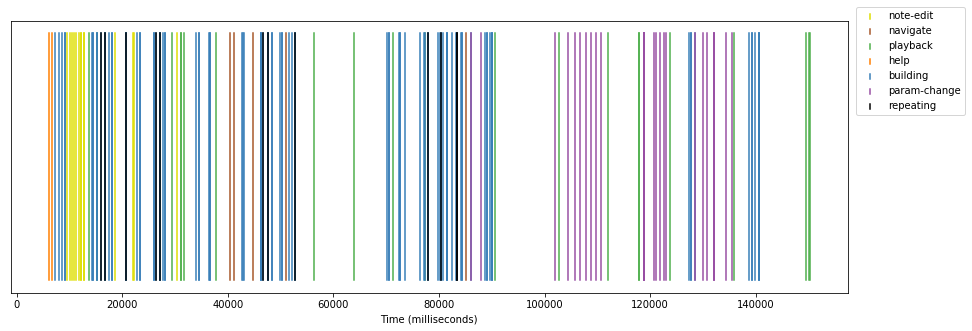

In [13]:
def drawTimeline():
    if (pattern.index.size > 0):
        pp.stem(pattern.elapsedtime, 
                pattern.ones, 
                CB_color_dict['yellow'], 
                markerfmt=' ', 
                label='note-edit', 
                use_line_collection=True, 
                basefmt=" ")

    if (navigate.index.size > 0):
        pp.stem(navigate.elapsedtime, 
                navigate.ones, 
                CB_color_dict['brown'], 
                markerfmt=' ', 
                label='navigate', 
                use_line_collection=True, 
                basefmt=" ")

    if (playback.index.size > 0):
        pp.stem(playback.elapsedtime, 
            playback.ones, 
            CB_color_dict['green'], 
            markerfmt=' ', 
            label='playback', 
            use_line_collection=True, 
            basefmt=" ")

    if (helps.index.size > 0):
        pp.stem(helps.elapsedtime, 
            helps.ones, 
            CB_color_dict['orange'], 
            markerfmt=' ', 
            label='help', 
            use_line_collection=True, 
            basefmt=" ")

    if (building.index.size > 0):
        pp.stem(building.elapsedtime, 
            building.ones, 
            CB_color_dict['blue'], 
            markerfmt=' ', 
            label='building', 
            use_line_collection=True, 
            basefmt=" ")

    if (parameter.index.size > 0):
        pp.stem(parameter.elapsedtime, 
            parameter.ones, 
            CB_color_dict['purple'], 
            markerfmt=' ', 
            label='param-change', 
            use_line_collection=True, 
            basefmt=" ")

    if (saving.index.size > 0):
        pp.stem(saving.elapsedtime, 
            saving.ones, 
            CB_color_dict['red'], 
            markerfmt=' ', 
            label='saving', 
            use_line_collection=True, 
            basefmt=" ")

    if (repeat.index.size > 0):
        pp.stem(repeat.elapsedtime, 
            repeat.ones, 
            CB_color_dict['black'], 
            markerfmt=' ', 
            label='repeating', 
            use_line_collection=True, 
            basefmt=" ")

    pp.rcParams["figure.figsize"] = [15,5]
    pp.legend(loc=(1.01,0.655))
    pp.xlabel("Time (milliseconds)")
    pp.yticks([]) #hide y axis 
    pp.savefig(file_path + "visualisation.png")
    pp.show()

drawTimeline()